In [5]:
import pandas as pd    ##제목이랑 그래프 타이틀 붙이기
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

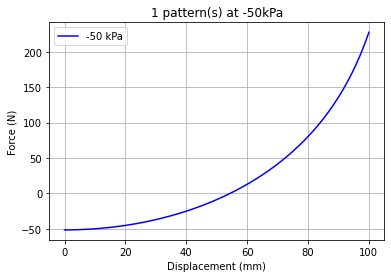

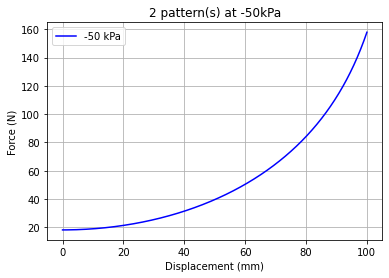

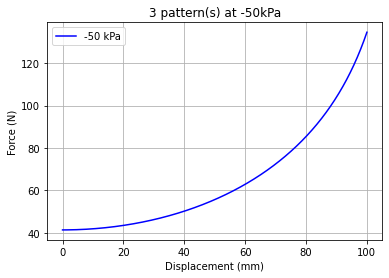

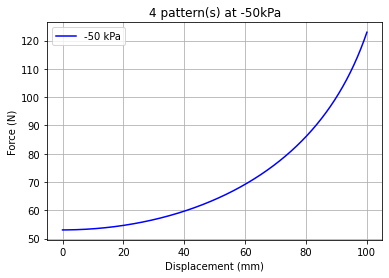

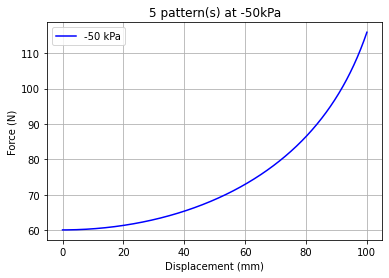

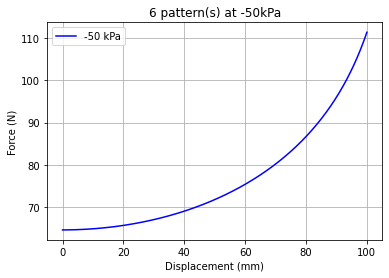

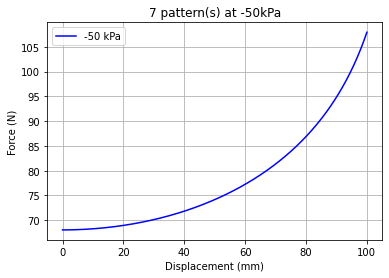

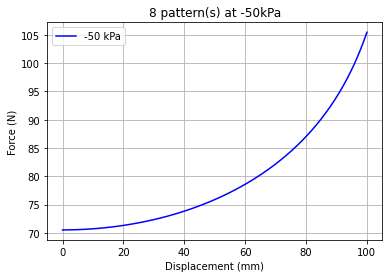

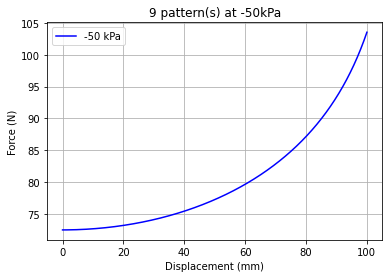

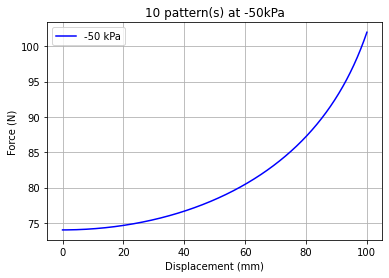

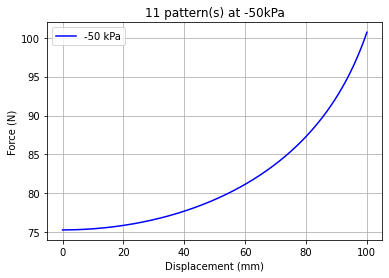

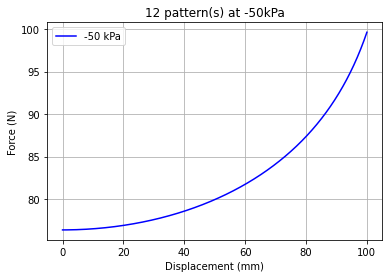

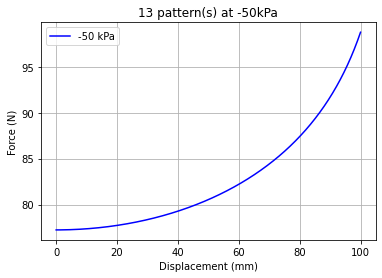

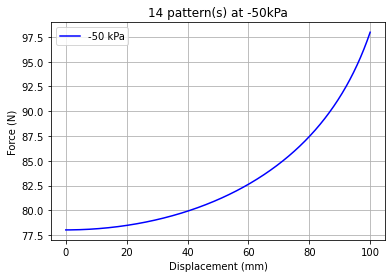

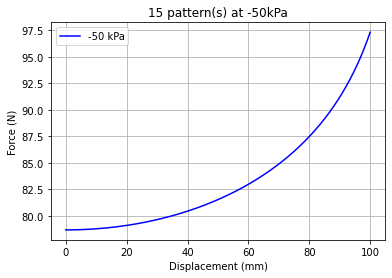

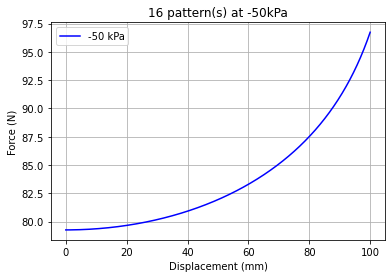

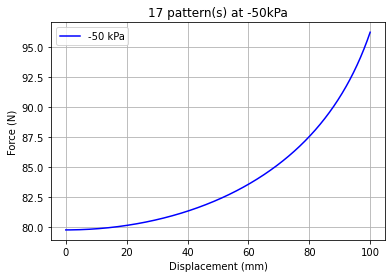

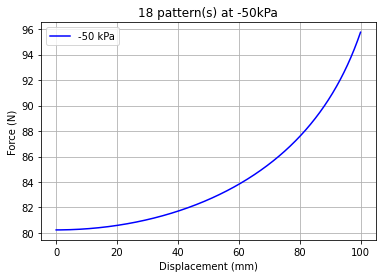

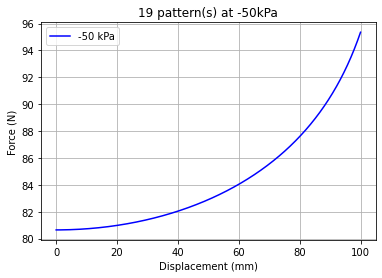

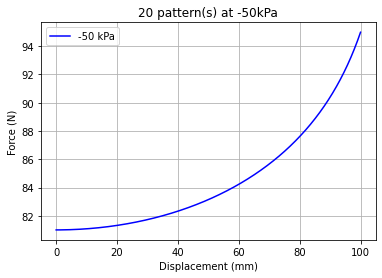

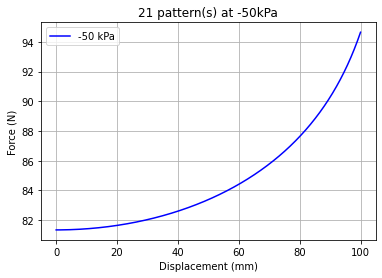

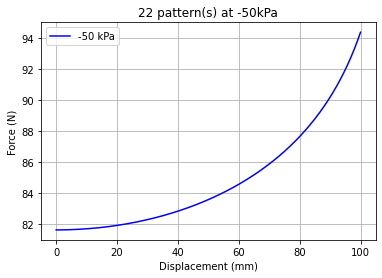

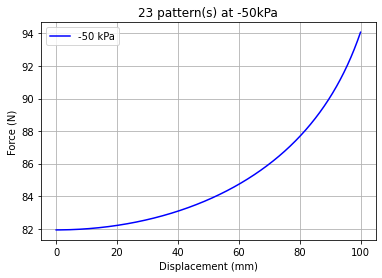

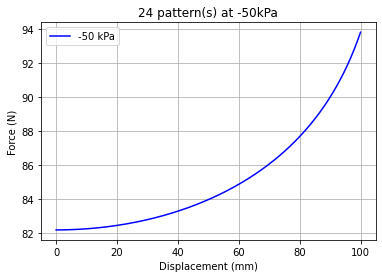

In [39]:
theta = np.linspace(np.pi/180*60,0,1000) # rad

p_max = 25

d = 10.2*10**-3
P = -50*10**3
F_MAX = np.zeros(p_max)
F_MIN = np.zeros(p_max)
F_DIF = np.zeros(p_max)

for i in range(1,p_max):
    
    L0=100/i/np.sin(np.pi/3)*10**-3
    L = L0*np.sin(theta)
    D = 27*10**-3
    L_tot = i*L*1000
    A = 2*(1+2**0.5)*D**2
    dL = L0*np.cos(theta)
    dT = dL/(L0*np.cos(theta))

    dV = A*0.5*L0*np.cos(theta)*dT-1/6*L0**2*(5*D+d)*(np.cos(theta)**2-np.sin(theta)**2)

    F = -P*dV/dL
    
    F_MAX[i] = F[np.abs(L_tot - 100).argmin()] 
    F_MIN[i] = F[np.abs(L_tot).argmin()] 
    F_DIF[i] = F_MAX[i] - F_MIN[i]

    plt.plot(L_tot,F,'b-', label='-50 kPa')
    plt.xlabel('Displacement (mm)')
    plt.ylabel('Force (N)')

    plt.legend()
    plt.grid(True)
    plt.title(str(i) + ' pattern(s) at -50kPa')
    plt.show()

In [9]:
pattern_count = range(1, 11)

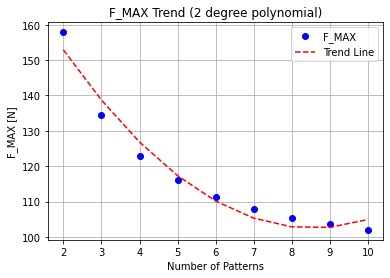

F_MAX Trend Function (degree 2): ax^2 + bx^1 + ... + c
a2 = 1.17
a1 = -20.05
a0 = 188.28
R^2 = 0.97



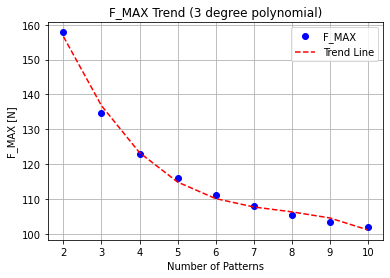

F_MAX Trend Function (degree 3): ax^3 + bx^2 + ... + c
a3 = -0.22
a2 = 5.20
a1 = -41.61
a0 = 220.81
R^2 = 1.00



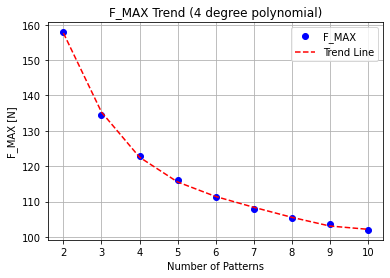

F_MAX Trend Function (degree 4): ax^4 + bx^3 + ... + c
a4 = 0.04
a3 = -1.23
a2 = 13.55
a1 = -69.50
a0 = 251.57
R^2 = 1.00



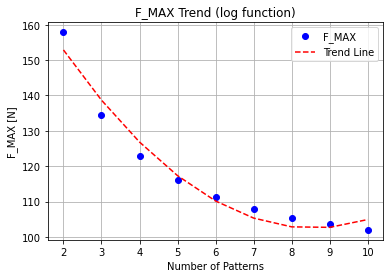

F_MAX Log Function: a * log(x) + b
a = -33.10
b = 173.50
R^2 = 0.95



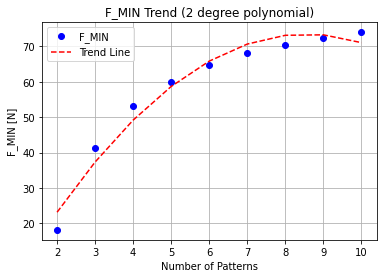

F_MIN Trend Function (degree 2): ax^2 + bx^1 + ... + c
a2 = -1.17
a1 = 20.05
a0 = -12.28
R^2 = 0.97



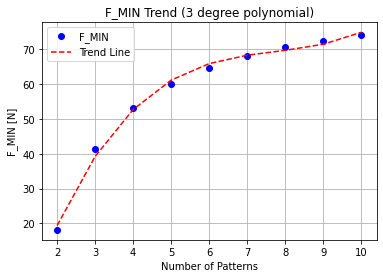

F_MIN Trend Function (degree 3): ax^3 + bx^2 + ... + c
a3 = 0.22
a2 = -5.20
a1 = 41.61
a0 = -44.81
R^2 = 1.00



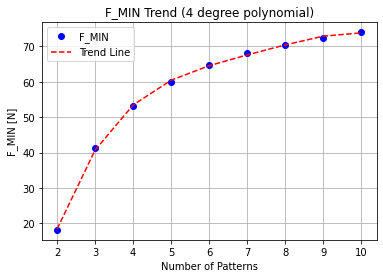

F_MIN Trend Function (degree 4): ax^4 + bx^3 + ... + c
a4 = -0.04
a3 = 1.23
a2 = -13.55
a1 = 69.50
a0 = -75.57
R^2 = 1.00



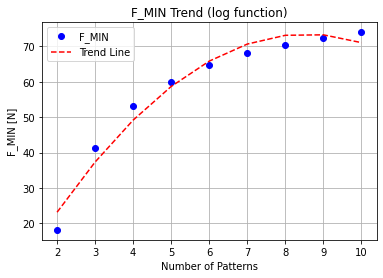

F_MIN Log Function: a * log(x) + b
a = 33.10
b = 2.50
R^2 = 0.95



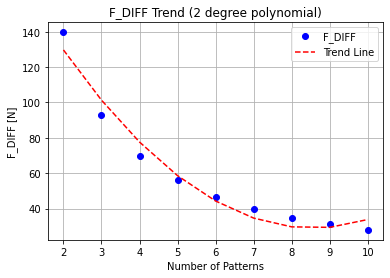

F_DIFF Trend Function (degree 2): ax^2 + bx^1 + ... + c
a2 = 2.34
a1 = -40.11
a0 = 200.56
R^2 = 0.97



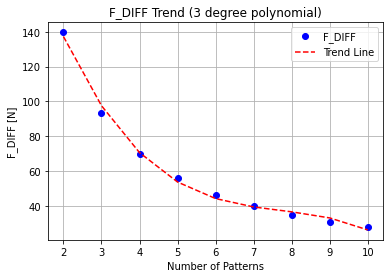

F_DIFF Trend Function (degree 3): ax^3 + bx^2 + ... + c
a3 = -0.45
a2 = 10.41
a1 = -83.22
a0 = 265.62
R^2 = 1.00



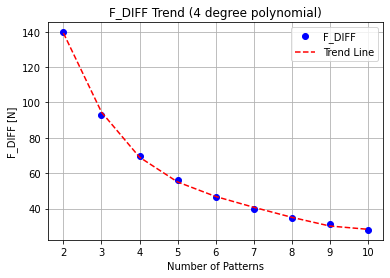

F_DIFF Trend Function (degree 4): ax^4 + bx^3 + ... + c
a4 = 0.08
a3 = -2.46
a2 = 27.10
a1 = -139.00
a0 = 327.14
R^2 = 1.00



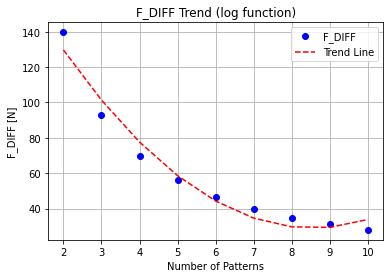

F_DIFF Log Function: a * log(x) + b
a = -66.20
b = 171.00
R^2 = 0.95



In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

def log_func(x, a, b):
    return a * np.log(x) + b

class TrendAnalyzer:
    def __init__(self, pattern_count, y, title):
        self.pattern_count = pattern_count
        self.y = y
        self.title = title
        self.coeff = None
        self.poly = None
        self.y_pred = None
        self.popt = None

    def fit(self, degree=2):
        self.coeff = np.polyfit(self.pattern_count, self.y, degree)
        self.poly = np.poly1d(self.coeff)
        self.y_pred = self.poly(self.pattern_count)
        self.popt, _ = curve_fit(log_func, self.pattern_count, self.y)

    def plot(self, func_type):
        plt.plot(self.pattern_count, self.y, 'bo', label=self.title)
        plt.plot(self.pattern_count, self.y_pred, 'r--', label='Trend Line')
        plt.xlabel('Number of Patterns')
        plt.ylabel(f'{self.title} [N]')
        plt.title(f'{self.title} Trend ({func_type})')
        plt.legend()
        plt.grid(True)
        plt.show()

    def print_func_and_r2(self, degree=2):
        print(f"{self.title} Trend Function (degree {degree}): ax^{degree} + bx^{degree-1} + ... + c")
        for i in range(degree, -1, -1):
            print(f"a{i} = {self.coeff[degree-i]:.2f}")
        print(f"R^2 = {r2_score(self.y, self.y_pred):.2f}")
        print()

    def print_log_func_and_r2(self):
        print(f"{self.title} Log Function: a * log(x) + b")
        print(f"a = {self.popt[0]:.2f}")
        print(f"b = {self.popt[1]:.2f}")
        print(f"R^2 = {r2_score(self.y, log_func(self.pattern_count, *self.popt)):.2f}")
        print()
        

# Number of patterns starting from N
pattern_start = 2
pattern_count = range(pattern_start, 11)

# F_MAX 추세 분석
analyzer_max = TrendAnalyzer(pattern_count, F_MAX[pattern_start:], 'F_MAX')
for degree in range(2, 5):
    analyzer_max.fit(degree)
    analyzer_max.plot(f'{degree} degree polynomial')
    analyzer_max.print_func_and_r2(degree)
analyzer_max.fit()
analyzer_max.plot('log function')
analyzer_max.print_log_func_and_r2()

# F_MIN 추세 분석
analyzer_min = TrendAnalyzer(pattern_count, F_MIN[pattern_start:], 'F_MIN')
for degree in range(2, 5):
    analyzer_min.fit(degree)
    analyzer_min.plot(f'{degree} degree polynomial')
    analyzer_min.print_func_and_r2(degree)
analyzer_min.fit()
analyzer_min.plot('log function')
analyzer_min.print_log_func_and_r2()

# F_DIFF 추세 분석
analyzer_diff = TrendAnalyzer(pattern_count, F_DIF[pattern_start:], 'F_DIFF')
for degree in range(2, 5):
    analyzer_diff.fit(degree)
    analyzer_diff.plot(f'{degree} degree polynomial')
    analyzer_diff.print_func_and_r2(degree)
analyzer_diff.fit()
analyzer_diff.plot('log function')
analyzer_diff.print_log_func_and_r2()

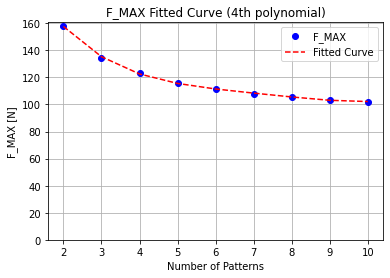

F_MAX Trend Function (degree 4): ax^4 + bx^3 + ... + c
a4 = 0.04
a3 = -1.23
a2 = 13.55
a1 = -69.50
a0 = 251.57
R^2 = 1.00



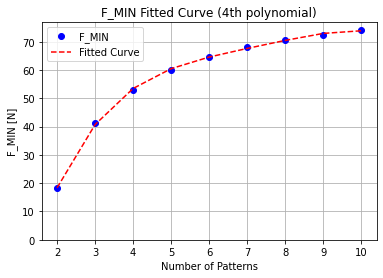

F_MIN Trend Function (degree 4): ax^4 + bx^3 + ... + c
a4 = -0.04
a3 = 1.23
a2 = -13.55
a1 = 69.50
a0 = -75.57
R^2 = 1.00



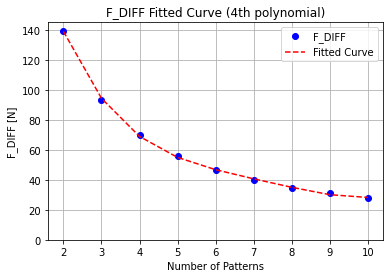

F_DIFF Trend Function (degree 4): ax^4 + bx^3 + ... + c
a4 = 0.08
a3 = -2.46
a2 = 27.10
a1 = -139.00
a0 = 327.14
R^2 = 1.00



In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

def log_func(x, a, b):
    return a * np.log(x) + b

class TrendAnalyzer:
    def __init__(self, pattern_count, y, title):
        self.pattern_count = pattern_count
        self.y = y
        self.title = title
        self.coeff = None
        self.poly = None
        self.y_pred = None
        self.popt = None

    def fit(self, degree=2):
        self.coeff = np.polyfit(self.pattern_count, self.y, degree)
        self.poly = np.poly1d(self.coeff)
        self.y_pred = self.poly(self.pattern_count)
        self.popt, _ = curve_fit(log_func, self.pattern_count, self.y)

    def plot(self, func_type):
        plt.plot(self.pattern_count, self.y, 'bo', label=self.title)
        plt.plot(self.pattern_count, self.y_pred, 'r--', label='Fitted Curve')
        plt.xlabel('Number of Patterns')
        plt.ylabel(f'{self.title} [N]')
        plt.title(f'{self.title} Fitted Curve ({func_type})')
        plt.legend()
        plt.grid(True)
        plt.ylim(bottom=0)  # Set the y-axis to start from 0
        plt.show()

    def print_func_and_r2(self, degree=2):
        print(f"{self.title} Trend Function (degree {degree}): ax^{degree} + bx^{degree-1} + ... + c")
        for i in range(degree, -1, -1):
            print(f"a{i} = {self.coeff[degree-i]:.2f}")
        print(f"R^2 = {r2_score(self.y, self.y_pred):.2f}")
        print()

    def print_log_func_and_r2(self):
        print(f"{self.title} Log Function: a * log(x) + b")
        print(f"a = {self.popt[0]:.2f}")
        print(f"b = {self.popt[1]:.2f}")
        print(f"R^2 = {r2_score(self.y, log_func(self.pattern_count, *self.popt)):.2f}")
        print()
        

# Number of patterns starting from N
pattern_start = 2
pattern_count = range(pattern_start, 11)

# F_MAX 추세 분석
analyzer_max = TrendAnalyzer(pattern_count, F_MAX[pattern_start:], 'F_MAX')
for degree in range(4, 5):
    analyzer_max.fit(degree)
    analyzer_max.plot(f'{degree}th polynomial')
    analyzer_max.print_func_and_r2(degree)

# F_MIN 추세 분석
analyzer_min = TrendAnalyzer(pattern_count, F_MIN[pattern_start:], 'F_MIN')
for degree in range(4, 5):
    analyzer_min.fit(degree)
    analyzer_min.plot(f'{degree}th polynomial')
    analyzer_min.print_func_and_r2(degree)

# F_DIFF 추세 분석
analyzer_diff = TrendAnalyzer(pattern_count, F_DIF[pattern_start:], 'F_DIFF')
for degree in range(4, 5):
    analyzer_diff.fit(degree)
    analyzer_diff.plot(f'{degree}th polynomial')
    analyzer_diff.print_func_and_r2(degree)


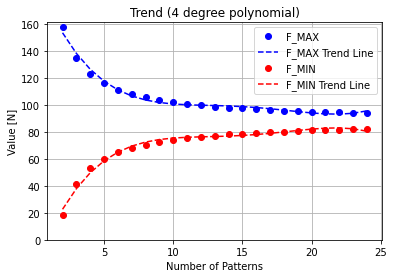

F_MAX Trend Function (degree 4): ax^4 + bx^3 + ... + c
a4 = 0.00
a3 = -0.12
a2 = 2.76
a1 = -26.83
a0 = 196.97
R^2 = 0.99

F_MIN Trend Function (degree 4): ax^4 + bx^3 + ... + c
a4 = -0.00
a3 = 0.12
a2 = -2.76
a1 = 26.83
a0 = -20.98
R^2 = 0.99



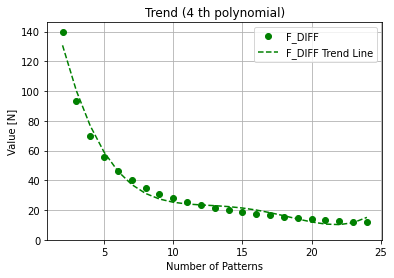

F_DIFF Trend Function (degree 4): ax^4 + bx^3 + ... + c
a4 = 0.00
a3 = -0.25
a2 = 5.51
a1 = -53.67
a0 = 217.95
R^2 = 0.99



In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

def log_func(x, a, b):
    return a * np.log(x) + b

class TrendAnalyzer:
    def __init__(self, pattern_count, y, title, color):
        self.pattern_count = pattern_count
        self.y = y
        self.title = title
        self.color = color
        self.coeff = None
        self.poly = None
        self.y_pred = None
        self.popt = None

    def fit(self, degree=2):
        self.coeff = np.polyfit(self.pattern_count, self.y, degree)
        self.poly = np.poly1d(self.coeff)
        self.y_pred = self.poly(self.pattern_count)
        self.popt, _ = curve_fit(log_func, self.pattern_count, self.y)

    def plot(self, func_type):
        plt.plot(self.pattern_count, self.y, self.color+'o', label=self.title)
        plt.plot(self.pattern_count, self.y_pred, self.color+'--', label=self.title+' Trend Line')
        plt.xlabel('Number of Patterns')
        plt.ylabel(f'Value [N]')
        plt.title(f'Trend ({func_type})')
        plt.legend()
        plt.ylim(bottom=0)  # Set the y-axis to start from 0

        plt.grid(True)

    def print_func_and_r2(self, degree=2):
        print(f"{self.title} Trend Function (degree {degree}): ax^{degree} + bx^{degree-1} + ... + c")
        for i in range(degree, -1, -1):
            print(f"a{i} = {self.coeff[degree-i]:.2f}")
        print(f"R^2 = {r2_score(self.y, self.y_pred):.2f}")
        print()

    def print_log_func_and_r2(self):
        print(f"{self.title} Log Function: a * log(x) + b")
        print(f"a = {self.popt[0]:.2f}")
        print(f"b = {self.popt[1]:.2f}")
        print(f"R^2 = {r2_score(self.y, log_func(self.pattern_count, *self.popt)):.2f}")
        print()

# Number of patterns starting from 2
pattern_count = range(2, p_max)

# F_MAX 추세 분석
analyzer_max = TrendAnalyzer(pattern_count, F_MAX[2:], 'F_MAX', 'b')
analyzer_max.fit(4)
analyzer_max.plot('4 degree polynomial')


# F_MIN 추세 분석
analyzer_min = TrendAnalyzer(pattern_count, F_MIN[2:], 'F_MIN', 'r')
analyzer_min.fit(4)
analyzer_min.plot('4 degree polynomial')


plt.show()

analyzer_max.print_func_and_r2(4)
analyzer_min.print_func_and_r2(4)



# F_DIFF 추세 분석
analyzer_diff = TrendAnalyzer(pattern_count, F_DIF[pattern_start:], 'F_DIFF','g')
analyzer_diff.fit(4)
analyzer_diff.plot('4 th polynomial')
plt.show()

analyzer_diff.print_func_and_r2(4)
